In [2]:
from individual_company_stock import getHistoryData
import pandas as pd
import numpy as np
from datetime import date,timedelta
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
symbols_read_path="D:\\programs\\ads_flask\\MW-NIFTY-50-symbols.csv"#path fo file with stock symbols to get data for
data_write_dir="D:\\programs\\ads_flask\\"#path of dir to write .csv files into
annot="complete"#Additional info to be added to file name(optional)

In [3]:
cdate=date.today()
cdate

datetime.date(2023, 7, 4)

In [4]:
stocks=pd.read_csv(symbols_read_path)
print("Number of stocks:"+str(stocks["SYMBOL"].size))

Number of stocks:50


In [8]:
stocks["SYMBOL"][13]

'INFY'

In [9]:
def strdate(cdate,ydiff=0,mdiff=0,day_range=False,daydiff=0):
    '''returns datetime in string with the option to get a different date'''
    if(day_range):
        return(cdate-timedelta(days=daydiff).strftime("%d-%m-%Y"))
    else:
        return cdate.replace(year=cdate.year-ydiff,month=cdate.month-mdiff).strftime("%d-%m-%Y")
def get_his(stock,startdate,enddate):
    '''retrives historical data of a stock for a given time frame'''
    temp=getHistoryData(stock,from_date=startdate,to_date=enddate)
    print(temp)
    return temp
    # ref: getHistoryData('SHREECEM',from_date='30-04-2020',to_date='30-04-2021')

In [10]:
hist=int(input("time(Natural Number) (in years)"))
dat_err=[]
for i in range(13,14):#stocks["SYMBOL"].size):
    df=pd.DataFrame()
    for j in range(0,hist):
        f=0
        while (f<10):
            try:
                t=get_his(stocks["SYMBOL"][i],strdate(cdate,1+j),strdate(cdate,0+j))
                break
            except:
                print("failed")
                f=f+1
                continue
        print("Recieved data\n\n")
        print(pd.DataFrame(t),flush=True)
        if t.empty:
            break
        else:
            clear_output(wait=True)
            df=pd.concat([df,t])
    if df.empty:
        dat_err.append(i)
    df=df.reset_index(drop=True)
    df=df.replace({',':''},regex=True)
    print("\n\nAggregated Data\n\n")
    print(df)
    # df.to_csv(path_or_buf=data_write_dir+annot+stocks["SYMBOL"][i]+".csv")

Empty DataFrame
Columns: [Date , series , OPEN , HIGH , LOW , PREV. CLOSE , ltp , close , vwap , 52W H , 52W L , VOLUME , VALUE , No of trades ]
Index: []
Recieved data


Empty DataFrame
Columns: [Date , series , OPEN , HIGH , LOW , PREV. CLOSE , ltp , close , vwap , 52W H , 52W L , VOLUME , VALUE , No of trades ]
Index: []


Aggregated Data


            Date  series     OPEN     HIGH      LOW  PREV. CLOSE      ltp   \
0     03-Jul-2023      EQ  1330.00  1346.00  1328.45      1335.50  1333.00   
1     30-Jun-2023      EQ  1308.20  1338.90  1304.45      1293.35  1337.85   
2     28-Jun-2023      EQ  1290.00  1296.70  1281.40      1279.15  1296.00   
3     27-Jun-2023      EQ  1280.00  1282.00  1274.20      1270.35  1278.95   
4     26-Jun-2023      EQ  1270.25  1274.00  1262.25      1265.00  1270.70   
...           ...     ...      ...      ...      ...          ...      ...   
6864  05-Jan-1996      EQ    401.5    401.5    401.5        406.3        -   
6865  04-Jan-1996      EQ    4

In [14]:
df.to_csv(path_or_buf=data_write_dir+annot+stocks["SYMBOL"][i]+".csv")

In [9]:
df=pd.read_csv(data_write_dir+annot+stocks["SYMBOL"][13]+".csv").drop(["Unnamed: 0"],axis=1)

In [10]:
df["close "]=df["close "].astype(float)

In [12]:
dates=df["Date "].iloc[np.arange(0,df["Date "].size,50)]

In [13]:
dates

0       03-Jul-2023
50      20-Apr-2023
100     02-Feb-2023
150     23-Nov-2022
200     09-Sep-2022
           ...     
6650    14-Nov-1996
6700    02-Sep-1996
6750    21-Jun-1996
6800    12-Apr-1996
6850    25-Jan-1996
Name: Date , Length: 138, dtype: object

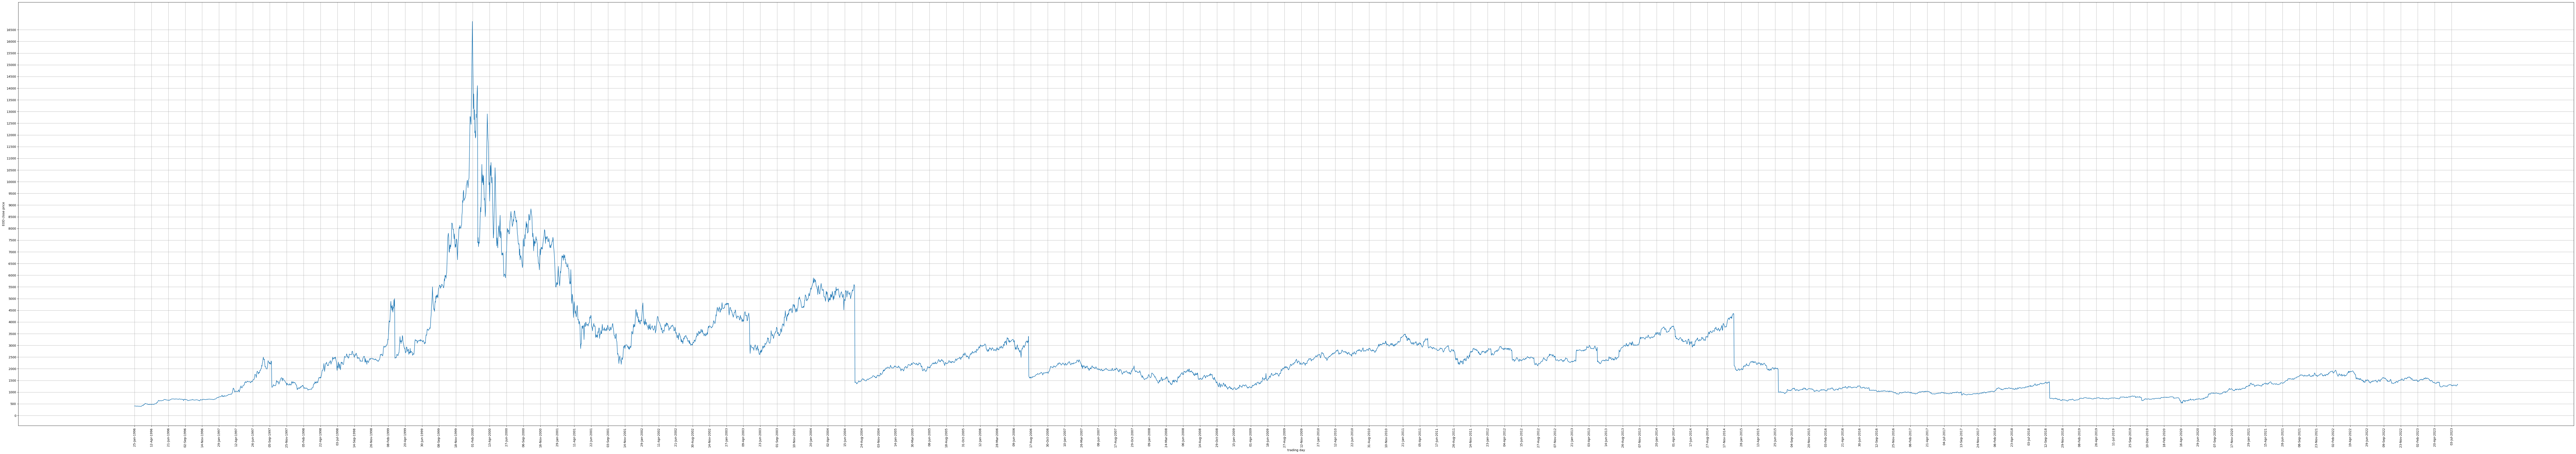

In [18]:
fig=plt.figure(figsize=(150,30))
plt.plot(np.arange(df["Date "].size),df["close "][::-1])
plt.xticks(ticks=np.arange(0,df["close "].size,50),labels=dates[::-1],rotation=90)
plt.yticks(np.arange(0,df["close "].max()+300,500))
plt.xlabel("trading day")
plt.ylabel("EOD close price")
plt.grid(visible=True)
plt.savefig("infy_complete.png",bbox_inches='tight')

In [10]:
if len(dat_err)!=0:
    print("There was an error in retriving data for these stocks:")
    print(pd.DataFrame(stocks["SYMBOL"][dat_err],index=dat_err))
else:
    print("Program completed execution succsessfully!")

Program completed execution succsessfully!


In [51]:
cust_symbol=[]# Example: "M%26M or M_M"

> NOTE: For stocks symbols containing non-alphanumeric text (Eg: M&M), perform the following:
 1. open NSE website
 2. find the stock bieng looked for
 3. copy what comes after "symbol=" in the URL into cust (Eg:M%26M)
 4. Repeat for all failed symbols 
 5. Run the code below

In [ ]:
for i in range(0,len(cust_symbol)):
    df=pd.DataFrame()
    for j in range(0,hist):
        t=get_his(cust_symbol[i],strdate(cdate,1+j),strdate(cdate,0+j))
        print("Recieved data\n\n")
        print(pd.DataFrame(t),flush=True)
        if t.empty:
            break
        else:
            clear_output(wait=True)
            df=pd.concat([df,t])
    if df.empty:
        dat_err.append(i)
    df=df.reset_index(drop=True)
    df=df.replace({',':''},regex=True)
    print("\n\nAggregated Data\n\n")
    print(df)
    df.to_csv(path_or_buf=data_write_dir+annot+stocks["SYMBOL"][dat_err[i]]+".csv")